In [ ]:
!pip install scikit-plot

In [ ]:
import pandas as pd
import numpy as np
import random
from scipy import stats
import plotly.express as px
import seaborn as sns
import scikitplot as skplt
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

np.random.seed(42)
random.seed(42)

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# EDA

In [ ]:
train = pd.read_csv("/content/students_train.csv")
train

ID  Код_группы  Год_Поступления  Пол Основания   Изучаемый_Язык  \
0          0       20018             2016  Муж        СН  Английский язык   
1          1       20846             2016  Жен        БН  Английский язык   
2          2       14762             2013  Жен        СН  Английский язык   
3          3       17815             2015  Жен        СН  Английский язык   
4          4       17011             2014  Жен        ОО  Английский язык   
...      ...         ...              ...  ...       ...              ...   
11465  11465       17890             2015  Жен        СН    Немецкий язык   
11466  11466       19795             2015  Жен        СН  Английский язык   
11467  11467       17040             2014  Жен        СН  Английский язык   
11468  11468       19821             2017  Муж        ОО  Английский язык   
11469  11469       17383             2015  Муж        ОО  Английский язык   

                 Дата_Рождения  \
0      1994-04-12 00:00:00.000   
1      1996-12-21 00:00:00.000   
2      1992-08-01 00:00:00.000   
3      1994-02-06 00:00:00.000   
4      1997-03-08 00:00:00.000   
...                        ...   
11465  1990-07-23 00:00:00.000   
11466  1997-10-18 00:00:00.000   
11467  1985-05-09 00:00:00.000   
11468  2000-02-11 00:00:00.000   
11469  1993-09-19 00:00:00.000   

                                            Уч_Заведение  \
0         ФГБОУ ВО Алтайский государственный университет   
1      КГБ ПОУ Международный колледж сыроделия и проф...   
2      ФГБОУ ВПО "Алтайский государственный университет"   
3            КГБОУСПО "Алтайский строительный техникум "   
4                                        МБОУ "Лицей №3"   
...                                                  ...   
11465                                     ГОУ ВПО "БПГУ"   
11466                                      МБОУ "СОШ №2"   
11467    ГОУ ВПО "Алтайский государственный университет"   
11468                                  МБОУ Гимназия №42   
11469  ФГБОУ ВПО "Алтайский государственный университет"   

                        Где_Находится_УЗ  Год_Окончания_УЗ  ...  Общежитие  \
0      Россия, Алтайский край, г Барнаул            2016.0  ...        0.0   
1      Россия, Алтайский край, г Барнаул            2016.0  ...        1.0   
2              Алтайский край г. Барнаул            2013.0  ...        0.0   
3                      р.п.Степное озеро            2014.0  ...        0.0   
4              Алтайский край, Барнаул г            2014.0  ...        0.0   
...                                  ...               ...  ...        ...   
11465             Алтайский край,Бийск г            2010.0  ...        0.0   
11466     Тверская обл, ЗАТО Озёрный пгт            2015.0  ...        1.0   
11467          Алтайский край, Барнаул г            2007.0  ...        0.0   
11468         Алтайский край, г. Барнаул            2017.0  ...        0.0   
11469          Алтайский край, Барнаул г            2015.0  ...        0.0   

      Наличие_Матери Наличие_Отца Страна_Родители  Опекунство  Село  \
0                  1          1.0          Россия         0.0   1.0   
1                  1          1.0          Россия         0.0   0.0   
2                  0          0.0          Россия         0.0   0.0   
3                  1          1.0          Россия         0.0   0.0   
4                  0          0.0          Россия         0.0   0.0   
...              ...          ...             ...         ...   ...   
11465              0          0.0          Россия         0.0   0.0   
11466              0          0.0          Россия         0.0   1.0   
11467              0          0.0          Россия         0.0   0.0   
11468              1          1.0          Россия         0.0   0.0   
11469              0          0.0          Россия         0.0   1.0   

       Иностранец КодФакультета  СрБаллАттестата  Статус  
0             0.0          26.0             45.0       1  
1             0.0          34.0             57.

## Смотрим на данные

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11470 entries, 0 to 11469
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                11470 non-null  int64  
 1   Код_группы        11470 non-null  int64  
 2   Год_Поступления   11470 non-null  int64  
 3   Пол               11464 non-null  object 
 4   Основания         11470 non-null  object 
 5   Изучаемый_Язык    10744 non-null  object 
 6   Дата_Рождения     11470 non-null  object 
 7   Уч_Заведение      10381 non-null  object 
 8   Где_Находится_УЗ  10263 non-null  object 
 9   Год_Окончания_УЗ  10332 non-null  float64
 10  Пособие           10595 non-null  float64
 11  Страна_ПП         11163 non-null  object 
 12  Регион_ПП         10934 non-null  object 
 13  Город_ПП          11070 non-null  object 
 14  Общежитие         11398 non-null  float64
 15  Наличие_Матери    11470 non-null  int64  
 16  Наличие_Отца      11470 non-null  float6

##  Проверка на выбросы и дубликаты

In [ ]:
train.describe()

ID    Код_группы  Год_Поступления  Год_Окончания_УЗ  Пособие  \
count  11470.000000  11470.000000     11470.000000      10332.000000  10595.0   
mean    5734.500000  18163.195292      2014.890671       2013.768777      0.0   
std     3311.248128   2484.483394         2.657686          4.207044      0.0   
min        0.000000  11550.000000      2001.000000       1974.000000      0.0   
25%     2867.250000  16875.000000      2013.000000       2013.000000      0.0   
50%     5734.500000  18442.000000      2015.000000       2015.000000      0.0   
75%     8601.750000  20086.000000      2016.000000       2016.000000      0.0   
max    11469.000000  22824.000000      2212.000000       2020.000000      0.0   

          Общежитие  Наличие_Матери  Наличие_Отца    Опекунство          Село  \
count  11398.000000    11470.000000  11470.000000  11470.000000  11398.000000   
mean       0.218108        0.507585      0.505580      0.000349      0.229777   
std        0.412980        0.499964      0.499991      0.018672      0.420708   
min        0.000000        0.000000      0.000000      0.000000      0.000000   
25%        0.000000        0.000000      0.000000      0.000000      0.000000   
50%        0.000000        1.000000      1.000000      0.000000      0.000000   
75%        0.000000        1.000000      1.000000      0.000000      0.000000   
max        1.000000        1.000000      1.000000      1.000000      1.000000   

         Иностранец  КодФакультета  СрБаллАттестата        Статус  
count  11193.000000   11470.000000     11470.000000  11470.000000  
mean       0.067900      32.459895        72.539238      0.363034  
std        0.251585       8.446696       252.233322      0.480895  
min        0.000000      24.000000         0.000000      0.000000  
25%        0.000000      26.000000        47.000000      0.000000  
50%        0.000000      28.000000        61.000000      0.000000  
75%        0.000000      40.000000        76.000000      1.000000  
max        1.000000      53.000000      5000.000000      1.000000

число дубликатов

In [ ]:
len(train)- len(train.drop_duplicates())

0

## Целевая переменная

In [ ]:
fig = px.histogram(train, # возьмем данные
             x = 'Статус', # диаграмму будем строить по столбцу target_oil
             color = 'Статус', # с разбивкой по target_oil
             barmode = 'group', # разделенные столбцы располагаются рядом друг с другом
             text_auto = True, # выведем количество наблюдений в каждом столбце
             title = 'Class distribution in the data' # также добавим заголовок
             )

fig.show()

## Посмотрим на гистограммы признаков

In [ ]:
for col in train.columns:
    if col != "target_oil":
        fig = px.histogram(train, x=col, y=col, color="target_oil", marginal="box",
                           hover_data=train.columns)
        fig.show()

In [ ]:
train

index                name  \
0         0         Stackdriver   
1         1  Authix Tecnologies   
2         2              Lytics   
3         3       1World Online   
4         4      Enure Networks   
...     ...                 ...   
5507   5507                 ice   
5508   5508         Course Hero   
5509   5509        DVS Sciences   
5510   5510               KAYAK   
5511   5511           Procam TV   

                                               overview  category_code  \
0     Stackdriver provides a [powerfully simple moni...     enterprise   
1     Authix Tecnologies is a Torino based start-up ...       security   
2     Lytics provides B2C marketers the first analyt...       software   
3     1World Online is a Silicon Valley-based startu...     enterprise   
4     Enure Networks, Ltd. provides home-network man...       software   
...                                                 ...            ...   
5507  Ice.com is one of the leading e-commerce websi...      ecommerce   
5508  Course Hero is a digital learning platform tha...      education   
5509  DVS Sciences, Inc. manufactures and has global...  manufacturing   
5510  KAYAK is a travel search engine.  It indexes h...         search   
5511  Procam Television has been supplying kit and c...    games_video   

                                               tag_list country_code  \
0     application-management, cloud-monitoring, moni...          USA   
1                               authentication-solution          GRC   
2            analytics, big-data, data-science, bigdata          USA   
3          social-research, big-data, analytics, mobile          USA   
4                                                   NaN          ISR   
...                                                 ...          ...   
5507                                 jewelry, ecommerce          USA   
5508  social-learning-network, online-courses, onlin...          USA   
5509                                                NaN          USA   
5510                      travel, travelsearch, airfare          USA   
5511                                                NaN          GBR   

      num_prev_rounds  has_raised_amount  ln_raised_amount  participants  \
0                   1                  1         15.424948             1   
1                   1                  1         13.340052             1   
2                   2                  1         14.603968             5   
3                   1                  1         13.815511             1   
4                   1                  1         15.894952             2   
...               ...                ...               ...           ...   
5507                1                  1         17.665658             1   
5508                2                  1         14.220976             6   
5509                1                  1         16.496532             3   
5510                1                  1         15.955577             2   
5511                1                  1         14.818879             0   

      previous_any_founder_experience  ipo_prob   ma_prob  has_next_round  
0                                   0  0.024390  0.182927               1  
1                                   0  0.000000  0.000000               1  
2                                   0  0.021505  0.242105               0  
3                                   0  0.000000  0.000000               0  
4                                   0  0.000000  0.000000               1  
...                               ...       ...       ...             ...  
5507                                0  0.000000  0.013889               0  
5508                                0  0.010811  0.128342               0  
5509                                0  0.000000  0.106667               0  
5510                                0  0.333333  0.000000               1  
5511                                0  0.000000  0.000000               0  

[5512

In [ ]:
columns = ['num_prev_rounds',	'has_raised_amount',	'ln_raised_amount',
           'participants',	'previous_any_founder_experience',	'ipo_prob',
           'ma_prob',	'has_next_round']

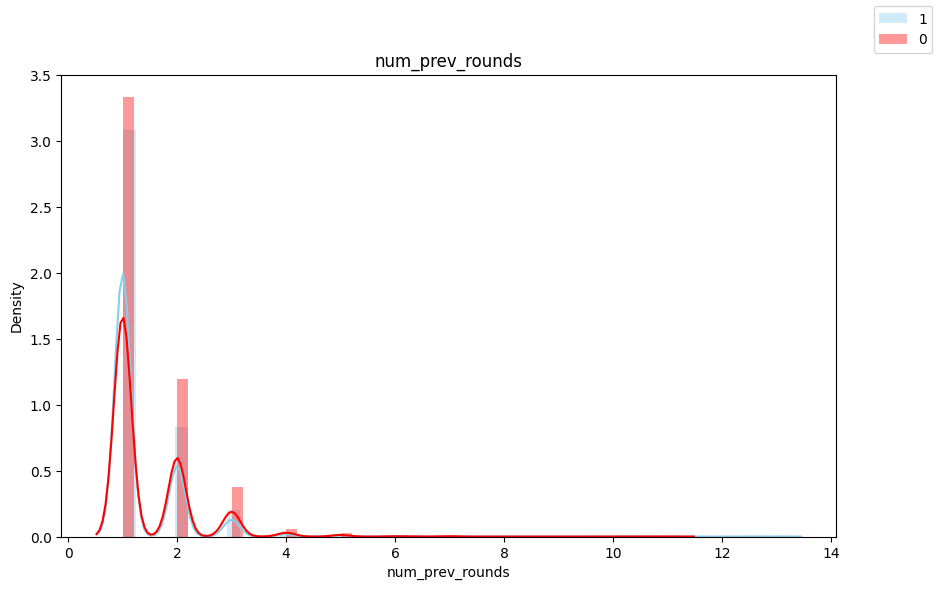

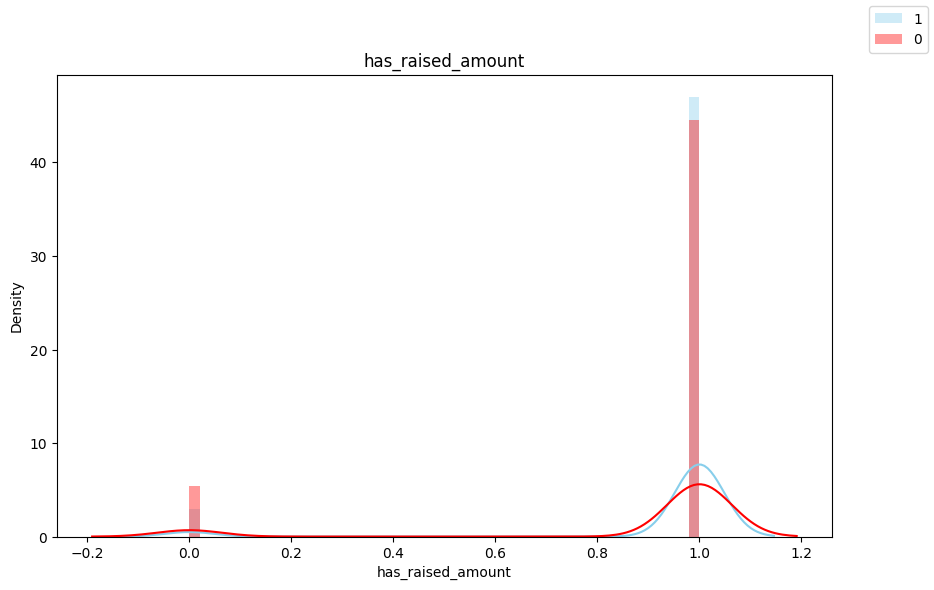

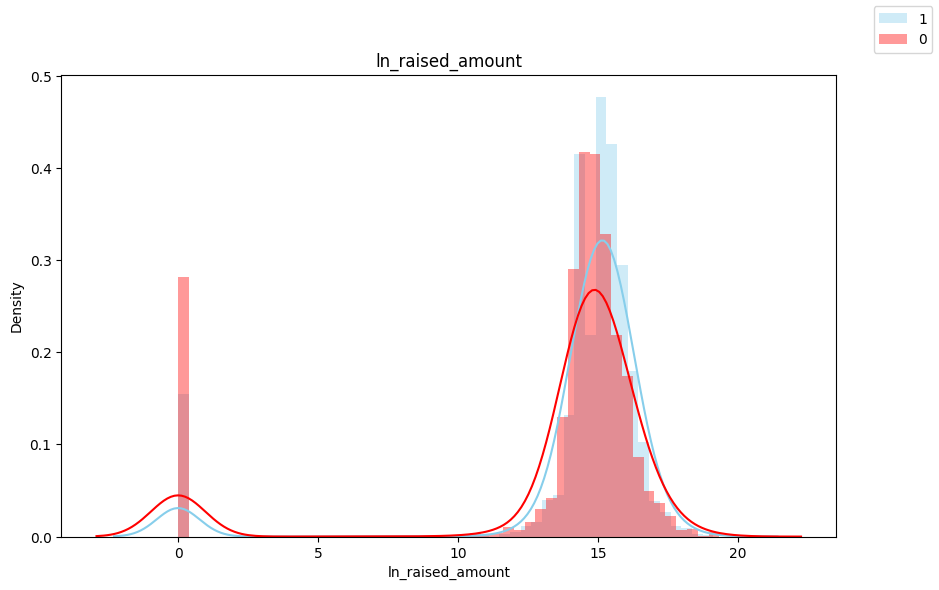

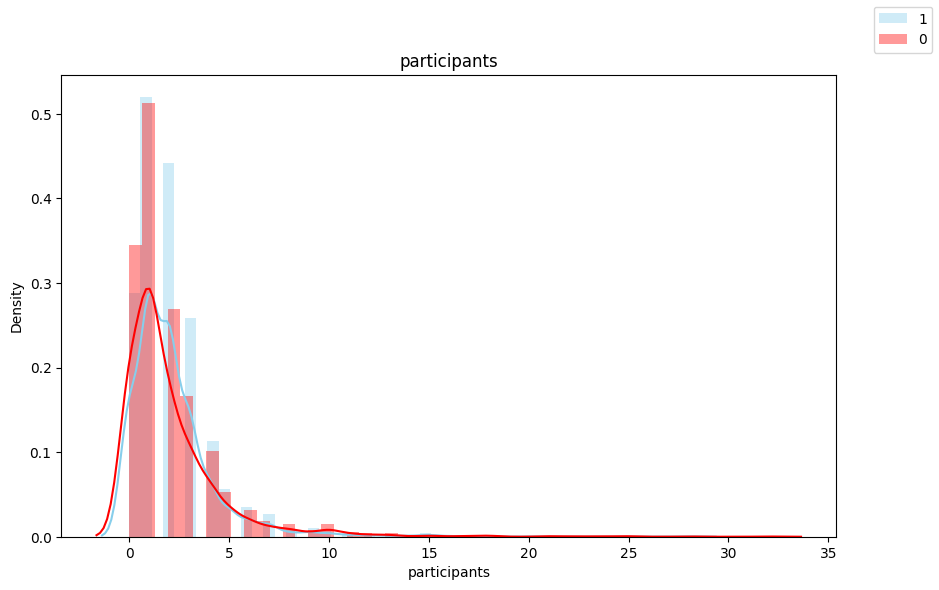

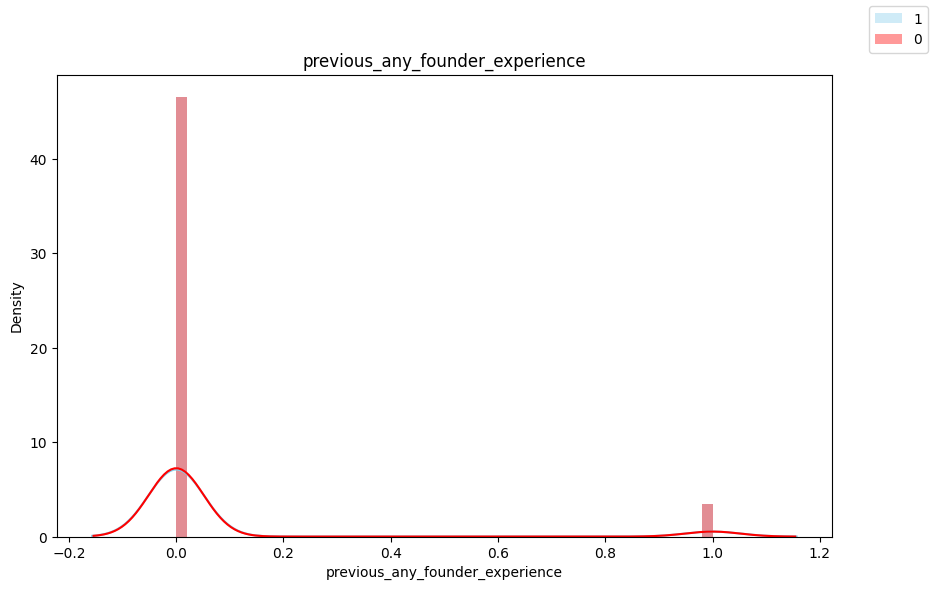

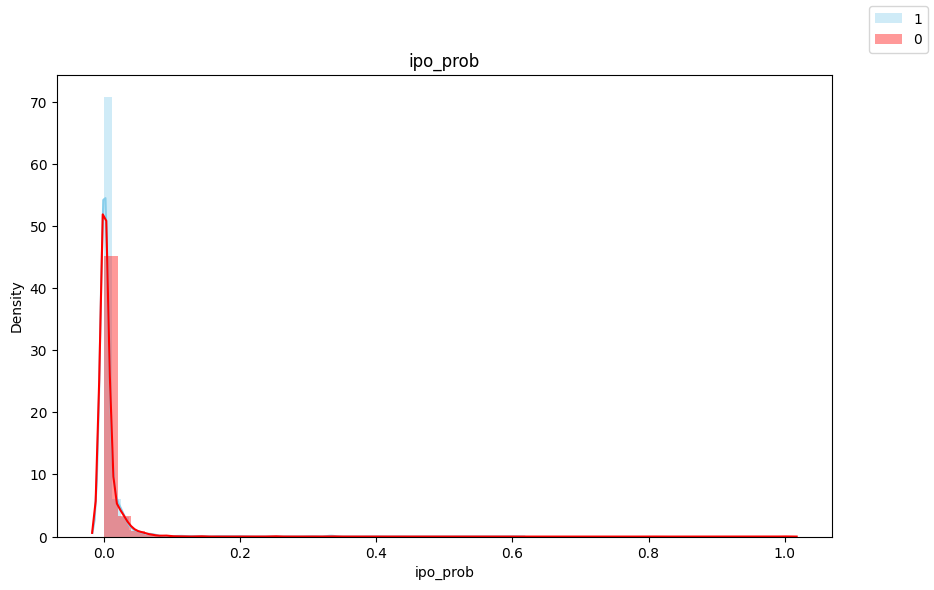

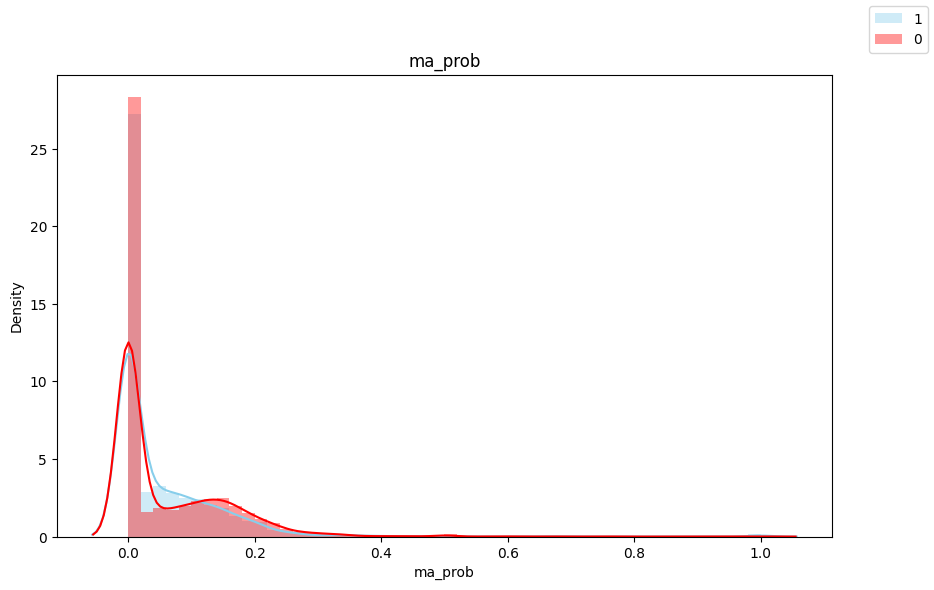

In [ ]:
for col in columns:
    if col != "has_next_round":
        fig = plt.figure(figsize=(10,6))
        sns.distplot(train[train["has_next_round"] ==1][f"{col}"] , color="skyblue", label=1);
        sns.distplot(train[train["has_next_round"] ==0][f"{col}"] , color="red", label=0);
        fig.legend()
        plt.title(f"{col}")
        plt.show()

## `NaN`-ы

In [ ]:
train.isna().sum()

ID                     0
Код_группы             0
Год_Поступления        0
Пол                    6
Основания              0
Изучаемый_Язык       726
Дата_Рождения          0
Уч_Заведение        1089
Где_Находится_УЗ    1207
Год_Окончания_УЗ    1138
Пособие              875
Страна_ПП            307
Регион_ПП            536
Город_ПП             400
Общежитие             72
Наличие_Матери         0
Наличие_Отца           0
Страна_Родители      390
Опекунство             0
Село                  72
Иностранец           277
КодФакультета          0
СрБаллАттестата        0
Статус                 0
dtype: int64

In [ ]:
fig = px.histogram(train, x='tag_list', y='tag_list', color="has_next_round", marginal="box",
                           hover_data=train.columns)
fig.show()

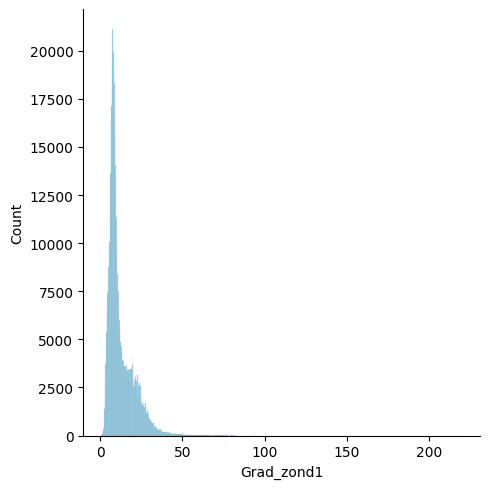

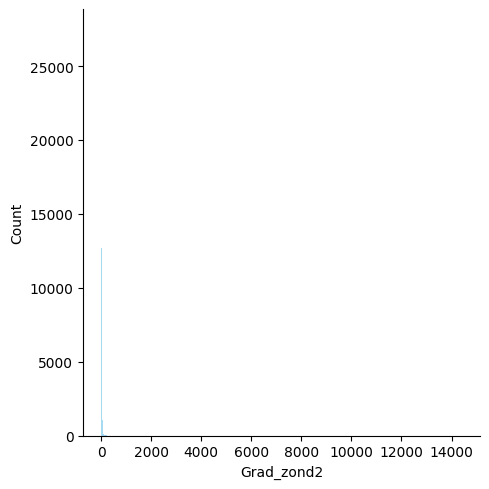

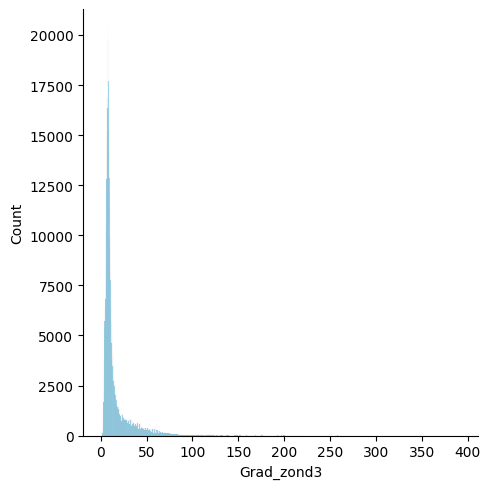

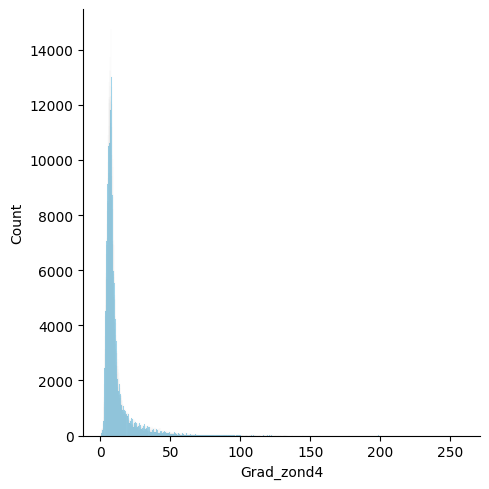

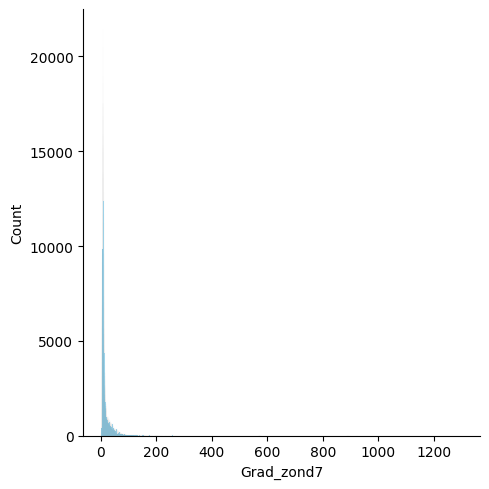

In [ ]:
sns.displot(train["Grad_zond1"] , color="skyblue", label="Symdol Length");
sns.displot(train["Grad_zond2"] , color="skyblue", label="Symdol Length");
sns.displot(train["Grad_zond3"] , color="skyblue", label="Symdol Length");
sns.displot(train["Grad_zond4"] , color="skyblue", label="Symdol Length");
sns.displot(train["Grad_zond7"] , color="skyblue", label="Symdol Length");

## Замена `NaN`-ов на `mode` или `median`

In [ ]:
train

index                name  \
0         0         Stackdriver   
1         1  Authix Tecnologies   
2         2              Lytics   
3         3       1World Online   
4         4      Enure Networks   
...     ...                 ...   
5507   5507                 ice   
5508   5508         Course Hero   
5509   5509        DVS Sciences   
5510   5510               KAYAK   
5511   5511           Procam TV   

                                               overview  category_code  \
0     Stackdriver provides a [powerfully simple moni...     enterprise   
1     Authix Tecnologies is a Torino based start-up ...       security   
2     Lytics provides B2C marketers the first analyt...       software   
3     1World Online is a Silicon Valley-based startu...     enterprise   
4     Enure Networks, Ltd. provides home-network man...       software   
...                                                 ...            ...   
5507  Ice.com is one of the leading e-commerce websi...      ecommerce   
5508  Course Hero is a digital learning platform tha...      education   
5509  DVS Sciences, Inc. manufactures and has global...  manufacturing   
5510  KAYAK is a travel search engine.  It indexes h...         search   
5511  Procam Television has been supplying kit and c...    games_video   

                                               tag_list country_code  \
0     application-management, cloud-monitoring, moni...          USA   
1                               authentication-solution          GRC   
2            analytics, big-data, data-science, bigdata          USA   
3          social-research, big-data, analytics, mobile          USA   
4                                                   NaN          ISR   
...                                                 ...          ...   
5507                                 jewelry, ecommerce          USA   
5508  social-learning-network, online-courses, onlin...          USA   
5509                                                NaN          USA   
5510                      travel, travelsearch, airfare          USA   
5511                                                NaN          GBR   

      num_prev_rounds  has_raised_amount  ln_raised_amount  participants  \
0                   1                  1         15.424948             1   
1                   1                  1         13.340052             1   
2                   2                  1         14.603968             5   
3                   1                  1         13.815511             1   
4                   1                  1         15.894952             2   
...               ...                ...               ...           ...   
5507                1                  1         17.665658             1   
5508                2                  1         14.220976             6   
5509                1                  1         16.496532             3   
5510                1                  1         15.955577             2   
5511                1                  1         14.818879             0   

      previous_any_founder_experience  ipo_prob   ma_prob  has_next_round  
0                                   0  0.024390  0.182927               1  
1                                   0  0.000000  0.000000               1  
2                                   0  0.021505  0.242105               0  
3                                   0  0.000000  0.000000               0  
4                                   0  0.000000  0.000000               1  
...                               ...       ...       ...             ...  
5507                                0  0.000000  0.013889               0  
5508                                0  0.010811  0.128342               0  
5509                                0  0.000000  0.106667               0  
5510                                0  0.333333  0.000000               1  
5511                                0  0.000000  0.000000               0  

[5512

In [ ]:
train.Grad_zond1 = train.Grad_zond1.fillna(np.median(train.Grad_zond1.dropna()))
train.Grad_zond2 = train.Grad_zond2.fillna(np.median(train.Grad_zond2.dropna()))
train.Grad_zond3 = train.Grad_zond3.fillna(np.median(train.Grad_zond3.dropna()))
train.Grad_zond4 = train.Grad_zond4.fillna(np.median(train.Grad_zond4.dropna()))
train.Grad_zond7 = train.Grad_zond7.fillna(np.median(train.Grad_zond7.dropna()))
train.PZ = train.PZ.fillna(np.median(train.PZ.dropna()))
train

MD    TVDSS  Layer    GK  NNKT_big      PS      IK     BK     PZ  \
0       2659.8 -2507.36      1  6.90      2.45  103.03  140.86   8.04  15.18   
1       2680.7 -2522.59      1  8.42      2.23  219.44   89.06   7.08  11.19   
2       2700.1 -2530.23      1  3.32      3.05  229.30  121.36   6.15   8.82   
3       2961.1 -2559.85      1  7.42      3.01  222.28  124.48   9.21   8.43   
4       2658.0 -2501.08      0  7.83      2.43   83.12   62.13   7.04   9.87   
...        ...      ...    ...   ...       ...     ...     ...    ...    ...   
886918  2814.6 -2603.65      6  5.11      2.19   96.22  155.43   5.94   6.37   
886919  2835.8 -2562.05      3  4.97      2.13   35.90   68.59  17.52  29.49   
886920  2660.7 -2467.83      0  7.35      1.43  125.19  223.53   3.40   4.29   
886921  2705.8 -2495.06      0  7.80      2.28   77.78   68.57   6.59   8.57   
886922  2807.8 -2506.34      1  6.67      2.97   77.88   83.44  11.05  16.73   

        Grad_zond1  Grad_zond2  Grad_zond3  Grad_zond4  Grad_zond7  \
0             6.52        8.94        7.58        7.79       12.64   
1             7.97       12.42       10.46        9.13       10.59   
2             6.60        8.43        7.28        7.03       10.21   
3             7.92        7.09        6.98        7.80        9.08   
4             7.58        9.68        8.05       10.39        8.56   
...            ...         ...         ...         ...         ...   
886918        5.99        8.14        6.25        6.37        6.42   
886919       20.00       42.95       33.33       28.20       13.97   
886920        3.19        3.64        4.85        6.54        6.43   
886921        8.27        8.51        7.49        6.55        7.21   
886922       12.09       13.43        5.48        7.28       13.85   

        target_oil  target_collector  Well  
0                0                 0   629  
1                0                 0    32  
2                0                 0    63  
3                0                 0   364  
4                0                 0   751  
...            ...               ...   ...  
886918           0                 0   541  
886919           1                 1   777  
886920           0                 0   785  
886921           0                 0   494  
886922           0                 0   813  

[886923 rows x 17 columns]

## Генерация фич

In [ ]:
X = train.drop(columns = ['Статус'])
y = train['Статус']
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42, train_size=0.8, shuffle=True)

In [ ]:
numerical_cols = X_train.select_dtypes(include = ['int64', 'float64']).columns
categorical_cols = X_train.select_dtypes(include = ['object']).columns
categorical_cols

Index(['Пол', 'Основания', 'Изучаемый_Язык', 'Дата_Рождения', 'Уч_Заведение',
       'Где_Находится_УЗ', 'Страна_ПП', 'Регион_ПП', 'Город_ПП',
       'Страна_Родители'],
      dtype='object')

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

numerical_transformer = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler',StandardScaler())])
categorical_transformer = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy='constant', fill_value= '')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers = [
        ('num',numerical_transformer, numerical_cols),
        ('cat',categorical_transformer,categorical_cols)
    ])

In [ ]:
train

ID  Код_группы  Год_Поступления  Пол Основания   Изучаемый_Язык  \
0          0       20018             2016  Муж        СН  Английский язык   
1          1       20846             2016  Жен        БН  Английский язык   
2          2       14762             2013  Жен        СН  Английский язык   
3          3       17815             2015  Жен        СН  Английский язык   
4          4       17011             2014  Жен        ОО  Английский язык   
...      ...         ...              ...  ...       ...              ...   
11465  11465       17890             2015  Жен        СН    Немецкий язык   
11466  11466       19795             2015  Жен        СН  Английский язык   
11467  11467       17040             2014  Жен        СН  Английский язык   
11468  11468       19821             2017  Муж        ОО  Английский язык   
11469  11469       17383             2015  Муж        ОО  Английский язык   

                 Дата_Рождения  \
0      1994-04-12 00:00:00.000   
1      1996-12-21 00:00:00.000   
2      1992-08-01 00:00:00.000   
3      1994-02-06 00:00:00.000   
4      1997-03-08 00:00:00.000   
...                        ...   
11465  1990-07-23 00:00:00.000   
11466  1997-10-18 00:00:00.000   
11467  1985-05-09 00:00:00.000   
11468  2000-02-11 00:00:00.000   
11469  1993-09-19 00:00:00.000   

                                            Уч_Заведение  \
0         ФГБОУ ВО Алтайский государственный университет   
1      КГБ ПОУ Международный колледж сыроделия и проф...   
2      ФГБОУ ВПО "Алтайский государственный университет"   
3            КГБОУСПО "Алтайский строительный техникум "   
4                                        МБОУ "Лицей №3"   
...                                                  ...   
11465                                     ГОУ ВПО "БПГУ"   
11466                                      МБОУ "СОШ №2"   
11467    ГОУ ВПО "Алтайский государственный университет"   
11468                                  МБОУ Гимназия №42   
11469  ФГБОУ ВПО "Алтайский государственный университет"   

                        Где_Находится_УЗ  Год_Окончания_УЗ  ...  Общежитие  \
0      Россия, Алтайский край, г Барнаул            2016.0  ...        0.0   
1      Россия, Алтайский край, г Барнаул            2016.0  ...        1.0   
2              Алтайский край г. Барнаул            2013.0  ...        0.0   
3                      р.п.Степное озеро            2014.0  ...        0.0   
4              Алтайский край, Барнаул г            2014.0  ...        0.0   
...                                  ...               ...  ...        ...   
11465             Алтайский край,Бийск г            2010.0  ...        0.0   
11466     Тверская обл, ЗАТО Озёрный пгт            2015.0  ...        1.0   
11467          Алтайский край, Барнаул г            2007.0  ...        0.0   
11468         Алтайский край, г. Барнаул            2017.0  ...        0.0   
11469          Алтайский край, Барнаул г            2015.0  ...        0.0   

      Наличие_Матери Наличие_Отца Страна_Родители  Опекунство  Село  \
0                  1          1.0          Россия         0.0   1.0   
1                  1          1.0          Россия         0.0   0.0   
2                  0          0.0          Россия         0.0   0.0   
3                  1          1.0          Россия         0.0   0.0   
4                  0          0.0          Россия         0.0   0.0   
...              ...          ...             ...         ...   ...   
11465              0          0.0          Россия         0.0   0.0   
11466              0          0.0          Россия         0.0   1.0   
11467              0          0.0          Россия         0.0   0.0   
11468              1          1.0          Россия         0.0   0.0   
11469              0          0.0          Россия         0.0   1.0   

       Иностранец КодФакультета  СрБаллАттестата  Статус  
0             0.0          26.0             45.0       1  
1             0.0          34.0             57.

In [ ]:
X_train_1 = preprocessor.fit(X_train)
X_train_1

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 Index(['ID', 'Код_группы', 'Год_Поступления', 'Год_Окончания_УЗ', 'Пособие',
       'Общежитие', 'Наличие_Матери', 'Наличие_Отца', 'Опекунство', 'Село',
       'Иностранец', 'КодФакультета', 'СрБаллАттестата'],
      dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value='',
                                                                strategy='constant')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 Index(['Пол', 'Основания', 'Изучаемый_Язык', 'Дата_Рождения', 'Уч_Заведение',
       'Где_Находится_УЗ', 'Страна_ПП', 'Регион_ПП', 'Город_ПП',
       'Страна_Родители'],
      dtype='object'))])

##  Визуализация данных

"fig = px.scatter(\n    pca_data,\n    x=0, y=1,\n    color=train.target_oil,\n    labels=labels,\n    title=f'PCA Transformed Data',\n)\nfig.show()"

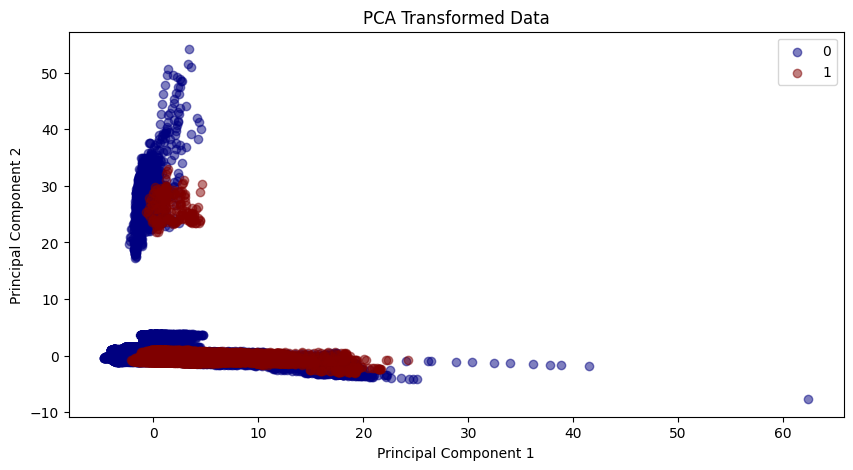

In [ ]:
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scal_data = scaler.fit_transform(train.drop(columns = ["target_oil"]))

n_components = 2
pca = TruncatedSVD(n_components)
pca.fit(scal_data)

pca_data = pca.transform(scal_data)

'''labels = {str(i): f"PC {i+1}" for i in range(n_components)}
labels['color'] = 'target_oil'''

unique = list(set(train.target_oil))
colors = [plt.cm.jet(float(i)/max(unique)) for i in unique]
plt.figure(figsize=(10, 5))
for i, u in enumerate(unique):
    xi = [pca_data[:, 0][j] for j  in range(len(pca_data[:, 0])) if train.target_oil[j] == u]
    yi = [pca_data[:, 1][j] for j  in range(len(pca_data[:, 1])) if train.target_oil[j] == u]
    plt.scatter(xi, yi, c=colors[i], label=str(u), alpha=0.5)

#plt.scatter(pca_data[:, 0], pca_data[:, 1], label=train.target_oil)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.title('PCA Transformed Data');

"""fig = px.scatter(
    pca_data,
    x=0, y=1,
    color=train.target_oil,
    labels=labels,
    title=f'PCA Transformed Data',
)
fig.show()"""

# Models

In [ ]:
X = train.drop(columns = ['target_oil'])
y = train['target_oil']
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42, train_size=0.8, shuffle=True)

In [ ]:
from sklearn.metrics import f1_score, accuracy_score

# SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
model = LogisticRegression()
sm = SMOTE()
pipeline = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('smote', sm),
    ('model', model)
])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

print('Accuracy:',accuracy_score(y_pred, y_test))
print('F1:',f1_score(y_pred, y_test, average='macro'))


skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=False, figsize=(10,6), cmap="OrRd")
plt.show()

TypeError: All intermediate steps should be transformers and implement fit and transform or be the string 'passthrough' 'SMOTE()' (type <class 'imblearn.over_sampling._smote.base.SMOTE'>) doesn't

In [ ]:
sm = SMOTE()

x_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

ValueError: could not convert string to float: 'Муж'

In [ ]:
y_train_sm.value_counts()

0    578298
1    578298
Name: target_oil, dtype: int64

In [ ]:
fig = px.histogram(y_train_sm, # возьмем данные
             x = 'target_oil', # диаграмму будем строить по столбцу target_oil
             color = 'target_oil', # с разбивкой по target_oil
             barmode = 'group', # разделенные столбцы располагаются рядом друг с другом
             text_auto = True, # выведем количество наблюдений в каждом столбце
             title = 'Class distribution in the data' # также добавим заголовок
             )

fig.show()

## LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression

Accuracy: 0.8134263295553618
F1: 0.7921468007993768


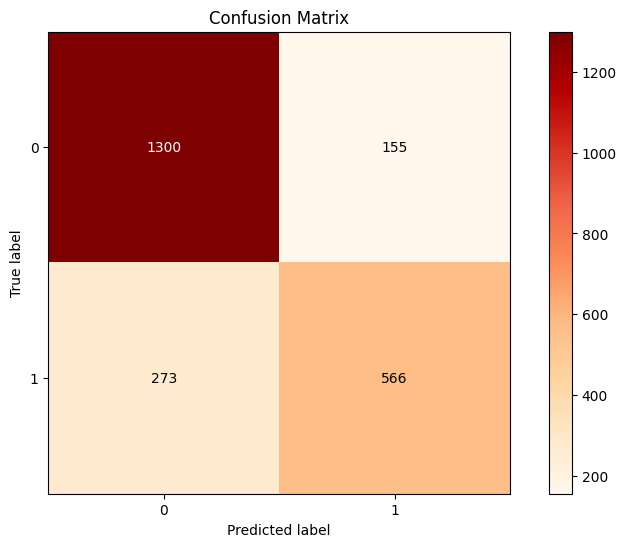

In [ ]:
model = LogisticRegression()

pipeline = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('model', model)
])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

print('Accuracy:',accuracy_score(y_pred, y_test))
print('F1:',f1_score(y_pred, y_test, average='macro'))


skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=False, figsize=(10,6), cmap="OrRd")
plt.show()

In [ ]:
np.max(0.40*(f1_score(y_pred, y_test, average='macro')- 0.5))

0.11685872031975074

Accuracy: 0.890870141218254
F1: 0.8387493709588192


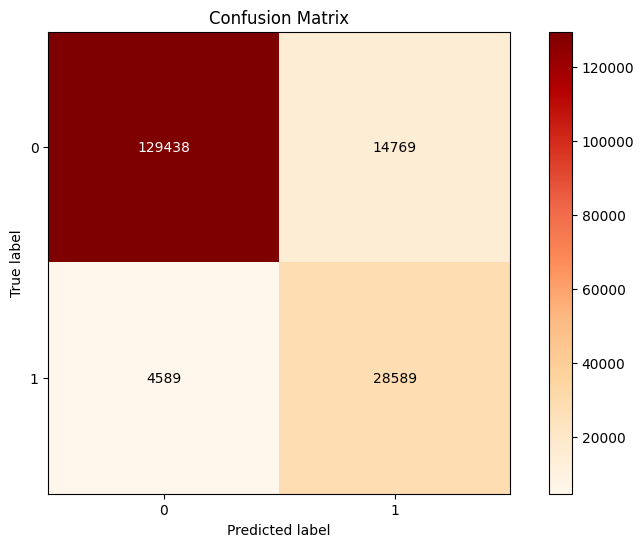

In [ ]:
model = LogisticRegression()

pipeline = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('model', model)
])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

print('Accuracy:',accuracy_score(y_pred, y_test))
print('F1:',f1_score(y_pred, y_test, average='macro'))


skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=False, figsize=(10,6), cmap="OrRd")
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

Accuracy: 0.9615863799081095
F1: 0.9365952917324017


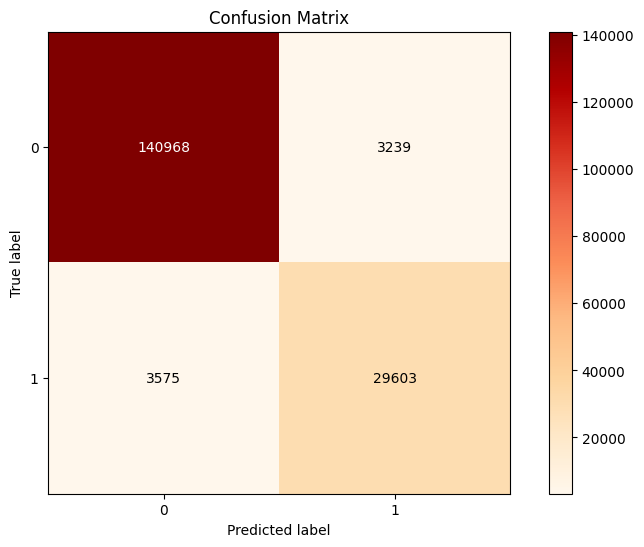

In [ ]:
scaler = StandardScaler()
X_train_scal = scaler.fit_transform(X_train)

clf = LogisticRegression()
clf.fit(X_train_scal, y_train)
y_pred = clf.predict(scaler.transform(X_test))

print('Accuracy:',accuracy_score(y_pred, y_test))
print('F1:',f1_score(y_pred, y_test, average='macro'))
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=False, figsize=(10,6), cmap="OrRd")
plt.show()

Accuracy: 0.9431970008738055
F1: 0.9145584689202324


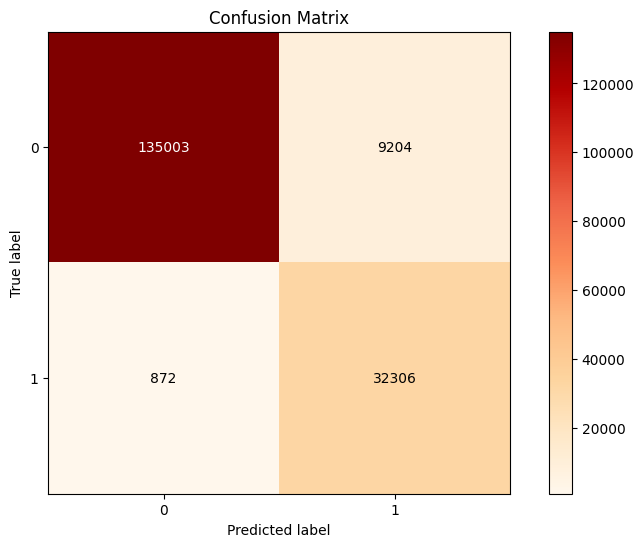

In [ ]:
scaler = StandardScaler()
X_train_scal = scaler.fit_transform(x_train_sm)

clf = LogisticRegression()
clf.fit(X_train_scal, y_train_sm)
y_pred = clf.predict(scaler.transform(X_test))

print('Accuracy:',accuracy_score(y_pred, y_test))
print('F1:',f1_score(y_pred, y_test, average='macro'))
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=False, figsize=(10,6), cmap="OrRd")
plt.show()

## kNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

Accuracy: 0.7942458587619878
F1: 0.7550139013582785


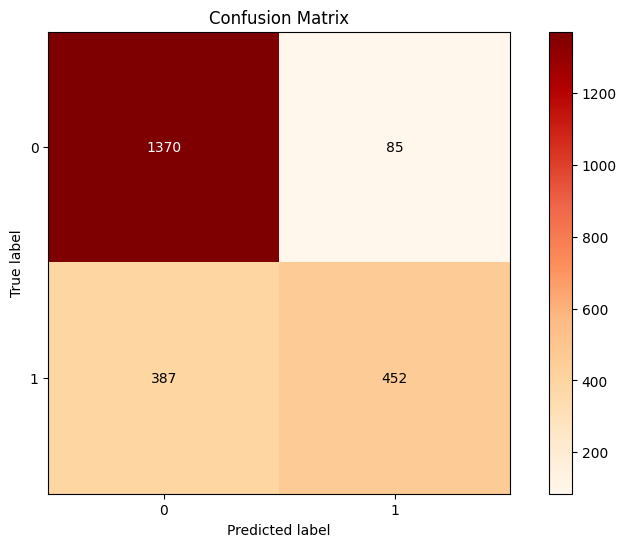

In [ ]:
#classifier_kNN = KNeighborsClassifier(n_neighbors = 15)
model = KNeighborsClassifier(n_neighbors = 15)

pipeline = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('model', model)
])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

print('Accuracy:',accuracy_score(y_pred, y_test))
print('F1:',f1_score(y_pred, y_test, average='macro'))


skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=False, figsize=(10,6), cmap="OrRd")
plt.show()

## CatBoost

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 2.3 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(
        eval_metric='F1',#F1???
        iterations=5000,
        learning_rate=0.05,
        #use_best_model= True,
        task_type='GPU',
        verbose=1000,
    #text_processing = text_processing
)
pipeline = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('model', model)
])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

print('Accuracy:',accuracy_score(y_pred, y_test))
print('F1:',f1_score(y_pred, y_test, average='macro'))

0:	learn: 0.6643357	total: 126ms	remaining: 10m 32s
1000:	learn: 0.8847097	total: 35s	remaining: 2m 19s
2000:	learn: 0.9022387	total: 1m 8s	remaining: 1m 43s
3000:	learn: 0.9101681	total: 1m 51s	remaining: 1m 14s
4000:	learn: 0.9174634	total: 2m 25s	remaining: 36.4s
4999:	learn: 0.9213162	total: 2m 59s	remaining: 0us
Accuracy: 0.8870967741935484
F1: 0.8742587267655376


## predict

In [ ]:
test = pd.read_csv("/content/students_test.csv")
test

ID  Код_группы  Год_Поступления  Пол Основания   Изучаемый_Язык  \
0     11470       17441             2015  Жен        ОО  Английский язык   
1     11471       19804             2017  Муж        ОО  Английский язык   
2     11472       14807             2013  Муж        СН    Немецкий язык   
3     11473       15398             2014  Жен        ОО    Немецкий язык   
4     11474       20103             2017  Жен        ДН  Английский язык   
...     ...         ...              ...  ...       ...              ...   
1495  12965       16121             2016  Муж        БН    Немецкий язык   
1496  12966       14271             2014  Жен        БН  Английский язык   
1497  12967       14308             2014  Жен        ОО  Английский язык   
1498  12968       20690             2016  Жен        ДН  Английский язык   
1499  12969       20655             2016  Муж        ДН  Английский язык   

                Дата_Рождения  \
0     1998-02-22 00:00:00.000   
1     1994-12-10 00:00:00.000   
2     1993-06-08 00:00:00.000   
3     1981-05-30 00:00:00.000   
4     1999-06-24 00:00:00.000   
...                       ...   
1495  1998-12-18 00:00:00.000   
1496  1992-12-18 00:00:00.000   
1497  1993-12-13 00:00:00.000   
1498  1995-06-28 00:00:00.000   
1499  1998-11-13 00:00:00.000   

                                           Уч_Заведение  \
0                               МБОУ "Хабарская СОШ №1"   
1        ФГБОУ ВО Алтайский государственный университет   
2     КГБОУ СПО "Алтайский промышленно-экономический...   
3     Восточно-Казахстанский государственный универс...   
4                                 МБОУ Родинская СОШ №1   
...                                                 ...   
1495                                             СОУ №2   
1496  КГБОУ "Алтайский архитектурно-строительный кол...   
1497  ФГБОУ ВПО "Алтайский государственный университет"   
1498  КГБПОУ Алтайский промышленно-экономический кол...   
1499                                      МБОУ СОШ №127   

                                   Где_Находится_УЗ  Год_Окончания_УЗ  ...  \
0           Алтайский край, Хабарский р-н, Хабары с            2015.0  ...   
1                        Алтайский край, г. Барнаул            2017.0  ...   
2                            Барнаул Алтайский край            2012.0  ...   
3                Казахстан Респ, Усть-Каменогорск г            2007.0  ...   
4           Алтайский край, Родинский р-н, Родино с            2017.0  ...   
...                                             ...               ...  ...   
1495  Таджикистан, Дангаринский р-н, Хатлонской обл            2016.0  ...   
1496                      Алтайский край, Барнаул г            2014.0  ...   
1497                      Алтайский край, Барнаул г            2014.0  ...   
1498              Россия, Алтайский край, г Барнаул            2016.0  ...   
1499              Россия, Алтайский край, г Барнаул            2016.0  ...   

           Город_ПП Общежитие Наличие_Матери Наличие_Отца  Страна_Родители  \
0          Хабары с       0.0              0          0.0           Россия   
1        г. Барнаул       0.0              1          1.0           Россия   
2         Барнаул г       0.0              0          0.0           Россия   
3     Новоалтайск г       0.0              0          0.0           Россия   
4          Родино с       0.0              1          1.0           Россия   
...             ...       ...            ...          ...              ...   
1495        Донгора       1.0              1          1.0      Таджикистан   
1496      Барнаул г       0.0              0          0.0           Россия   
1497      Барнаул г       0.0              0          0.0           Россия   
1498    Тюменцево с       0.0              1          1.0           Россия   
1499        Барнаул       0.0              1          1.0           Россия   

      Опекунство  Село Иностранец  КодФакультета  СрБаллАттестата  
0            0.0   1.0        0.0           41.0

In [ ]:
y_pred = pipeline.predict(test)
y_pred

array([0, 1, 0, ..., 1, 0, 0])

In [ ]:
submission = pd.read_csv("/content/students_sample_submission.csv")
submission['Статус'] = y_pred
submission

ID  Статус
0     11470       0
1     11471       1
2     11472       0
3     11473       0
4     11474       0
...     ...     ...
1495  12965       1
1496  12966       1
1497  12967       1
1498  12968       0
1499  12969       0

[1500 rows x 2 columns]

In [ ]:
submission.to_csv("catboost_pipeline_F1.csv", index = False)

In [ ]:
from catboost import CatBoostClassifier
from catboost import Pool


def fit_model(train_pool, validation_pool, **kwargs):
    model = CatBoostClassifier(
        eval_metric='Accuracy',
        iterations=5000,
        learning_rate=0.05,
        use_best_model= True,
        task_type='GPU',
        **kwargs
    )

    return model.fit(
        train_pool,
        eval_set=validation_pool,
        verbose=500,
    )

In [ ]:
train_pool = Pool(
    X_train, y_train
)


val_pool = Pool(
    X_test, y_test
)

print('Train dataset shape: {}\n'.format(train_pool.shape))

cat_boost = fit_model(train_pool, val_pool)

In [ ]:
y_pred = cat_boost.predict(val_pool)
print('Accuracy:',accuracy_score(y_pred, y_test))
print('F1:',f1_score(y_pred, y_test, average='macro'))

In [ ]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=False, figsize=(10,6))
plt.show()

In [ ]:
def fit_model(train_pool, validation_pool, **kwargs):
    model = CatBoostClassifier(
        eval_metric='Accuracy',
        iterations=5000,
        learning_rate=0.05,
        use_best_model= True,
        task_type='GPU',
        **kwargs
    )

    return model.fit(
        train_pool,
        eval_set=validation_pool,
        verbose=500,
    )


scaler = StandardScaler()
X_train_scal = scaler.fit_transform(X_train)
X_test_scal = scaler.transform(X_test)


train_pool = Pool(
    X_train_scal, y_train
)


val_pool = Pool(
    X_test_scal, y_test
)

print('Train dataset shape: {}\n'.format(train_pool.shape))

cat_boost = fit_model(train_pool, val_pool)
y_pred = cat_boost.predict(val_pool)
print('Accuracy:',accuracy_score(y_pred, y_test))
print('F1:',f1_score(y_pred, y_test, average='macro'))
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=False, figsize=(10,6))
plt.show()

# TEST

In [ ]:
test_df = pd.read_csv("/kaggle/input/looking-for-oil/to_predict.csv")
test_df

In [ ]:
test_df.info()

In [ ]:
test = scaler.transform(test_df.drop(columns = ['target_oil']))
test

In [ ]:
test_pool = Pool(
    test
)

In [ ]:
y_pred = cat_boost.predict(test_pool)
y_pred

In [ ]:
submission = pd.DataFrame({"target_oil":y_pred})
submission

In [ ]:
submission.info()

In [ ]:
submission.to_csv("submission_f.csv", index = False)